In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
ageMean=df["age"].mean()
df["age"].fillna(value=ageMean,inplace=True)

In [ ]:
#dtype of embarked is obbject so use mode
ambMode=df["embarked"].mode()
df["embarked"].fillna(value=ambMode,inplace=True)

In [ ]:
deckMode=df["deck"].mode()
df["deck"].fillna(value=deckMode,inplace=True)

<Axes: xlabel='age', ylabel='fare'>

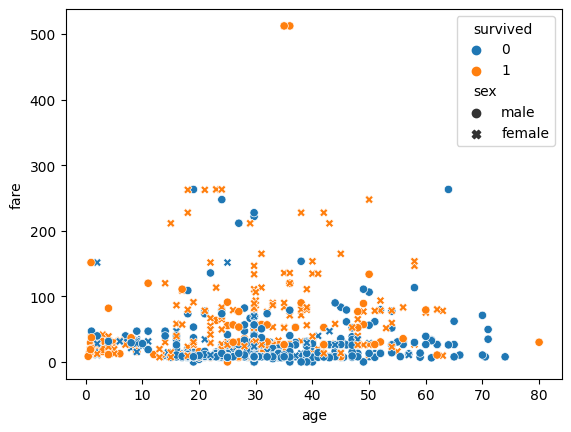

In [ ]:
# Scatterplot of age vs gender
sns.scatterplot(data=df, x='age', y='fare', hue='survived', style="sex")


In [ ]:
#Calculate mean of survivors
Sur_Mean=df["survived"].mean()
print("MEAN OF SURVIVORS")
print(Sur_Mean)

MEAN OF SURVIVORS
0.3838383838383838


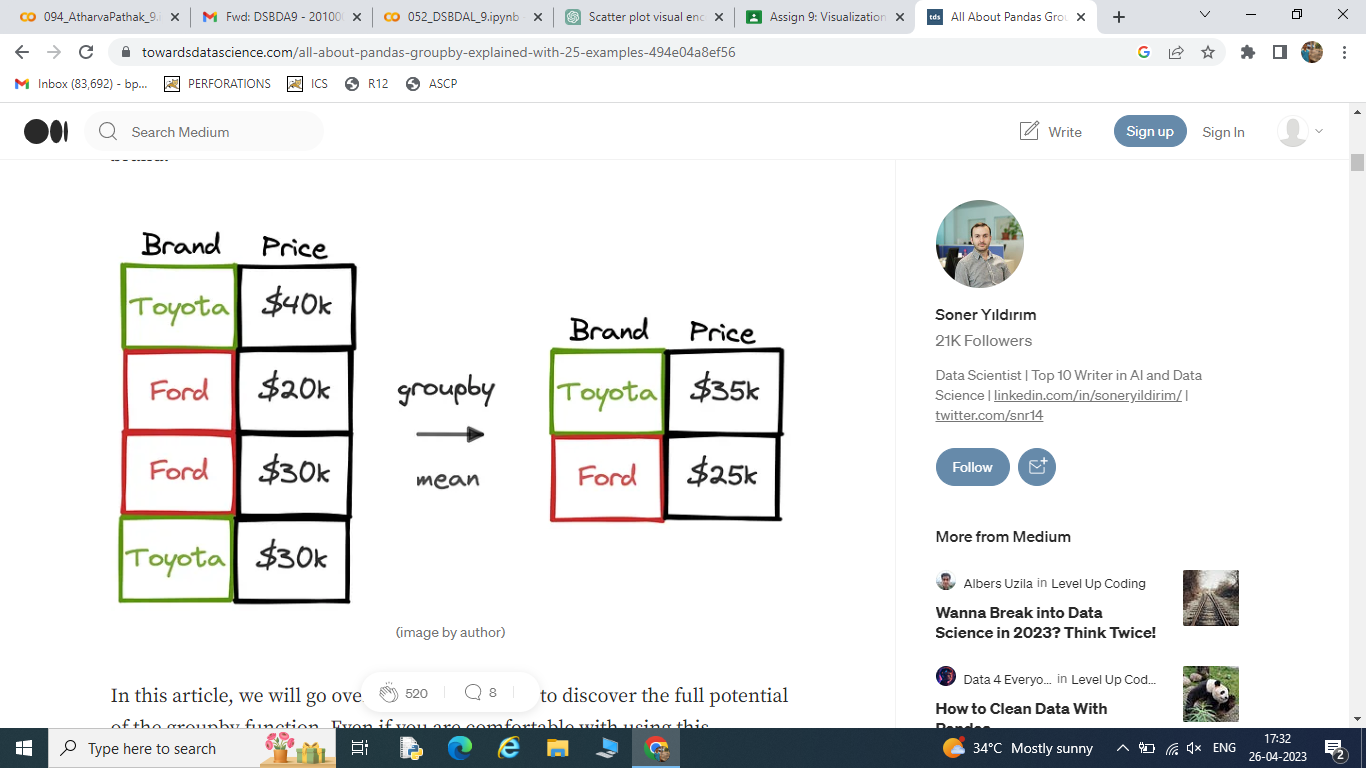

In [ ]:
Sur_Mean=df.groupby("sex")["survived"].mean()
print(Sur_Mean)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


---------UNIFROM DIST-----------

https://www.youtube.com/watch?v=Xr5DtHT7kt8

Uniform Distribution
Used to describe probability where every event has equal chances of occuring.

E.g. Generation of random numbers.

It has three parameters:

a - lower bound - default 0 .0.

b - upper bound - default 1.0.

size - The shape of the returned array.

from numpy import random

x = random.uniform(size=(2, 3))

print(x)


In [ ]:
uniform_dist = pd.Series(np.random.uniform(low=df['age'].min(),high=df['age'].max(), size=len(df['age'])))


This is a line of code written in Python that uses the pandas library and the numpy library to generate a random uniform distribution of values between the minimum and maximum age values in a pandas DataFrame called `df`. Here's a breakdown of what the code does:

- `np.random.uniform()` is a function from the numpy library that generates random numbers from a uniform distribution.
- `df['age'].min()` gets the minimum age value from the 'age' column in the `df` DataFrame.
- `df['age'].max()` gets the maximum age value from the 'age' column in the `df` DataFrame.
- `len(df['age'])` gets the length of the 'age' column in the `df` DataFrame.
- `pd.Series()` is a function from the pandas library that creates a one-dimensional labeled array called a Series.
- The `pd.Series()` function is passed the result of `np.random.uniform()`, which generates a random uniform distribution of values between the minimum and maximum age values in the `df` DataFrame, and a length equal to the length of the 'age' column in the `df` DataFrame.
- The resulting Series is assigned to the variable `uniform_dist`.

In summary, this line of code generates a random uniform distribution of values between the minimum and maximum age values in the `df` DataFrame, and stores it in a new pandas Series called `uniform_dist`.

<Axes: ylabel='Count'>

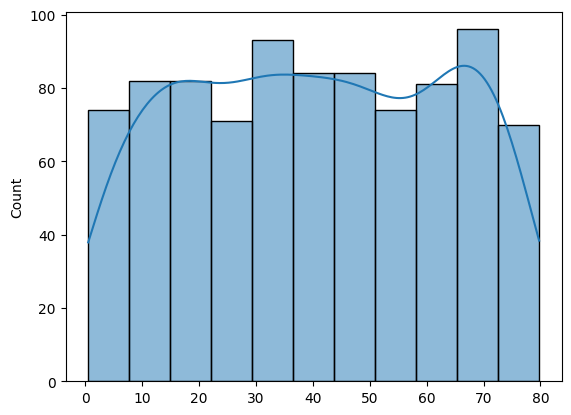

In [ ]:
sns.histplot(uniform_dist, kde=True)

Combine the scatter plot for survivals of male


and female in the same figure. Show different colors and intensities to add


more information to the plot.

In [ ]:
male_survivors = df[(df['survived']==1)&(df['sex']=='male')]
female_survivors = df[(df['survived']==1)&(df['sex']=='female')]

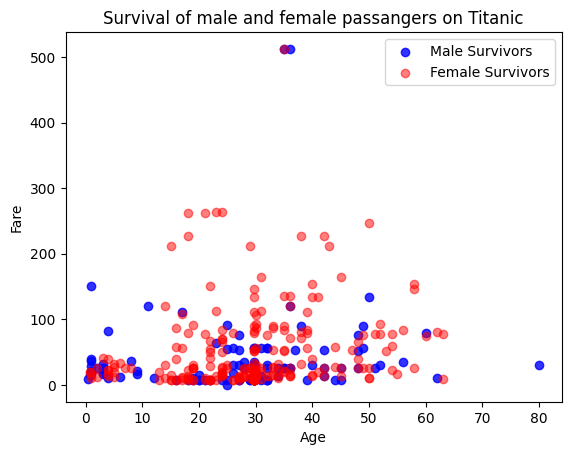

In [ ]:
plt.scatter(male_survivors['age'],male_survivors['fare'],color='b',alpha=0.8,label='Male Survivors')
plt.scatter(female_survivors['age'],female_survivors['fare'],color='r',alpha=0.5,label='Female Survivors')

plt.xlabel('Age')
plt.ylabel('Fare')

plt.title('Survival of male and female passangers on Titanic')
plt.legend()
plt.show()


```
This is a block of Python code that uses the pandas and matplotlib libraries to create a scatter plot of the ages and fares of male and female passengers who survived the Titanic disaster. Here's what each line of code does:

python
Copy code
male_survivors = df[(df['survived']==1)&(df['sex']=='male')]
female_survivors = df[(df['survived']==1)&(df['sex']=='female')]
These two lines of code create two new DataFrames, male_survivors and female_survivors, that contain only the rows from the original DataFrame df where survived is equal to 1 (i.e., the passenger survived) and the sex column is either 'male' or 'female', respectively.

python
Copy code
plt.scatter(male_survivors['age'],male_survivors['fare'],color='b',alpha=0.8,label='Male Survivors')
plt.scatter(female_survivors['age'],female_survivors['fare'],color='r',alpha=0.5,label='Female Survivors')
These two lines of code create the scatter plot by plotting the age column of the male_survivors DataFrame against the fare column of the male_survivors DataFrame, and then doing the same thing for the female_survivors DataFrame. The color argument is used to specify the color of the dots for each plot (blue for males and red for females), and the alpha argument is used to adjust the transparency of the dots. The label argument is used to create a legend for the plot.
```




# SCATTERPLOT+ BARPLOT

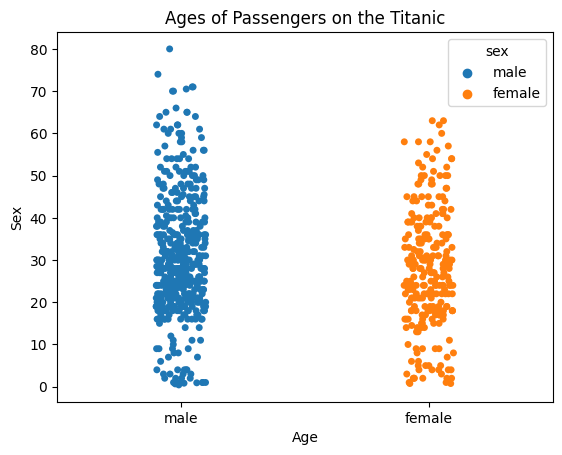

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Create a strip plot of the ages of passengers, colored by their sex
sns.stripplot(x='sex', y='age', data=titanic ,hue="sex")

# Add labels to the plot
plt.title('Ages of Passengers on the Titanic')
plt.xlabel('Age')
plt.ylabel('Sex')

# Show the plot
plt.show()

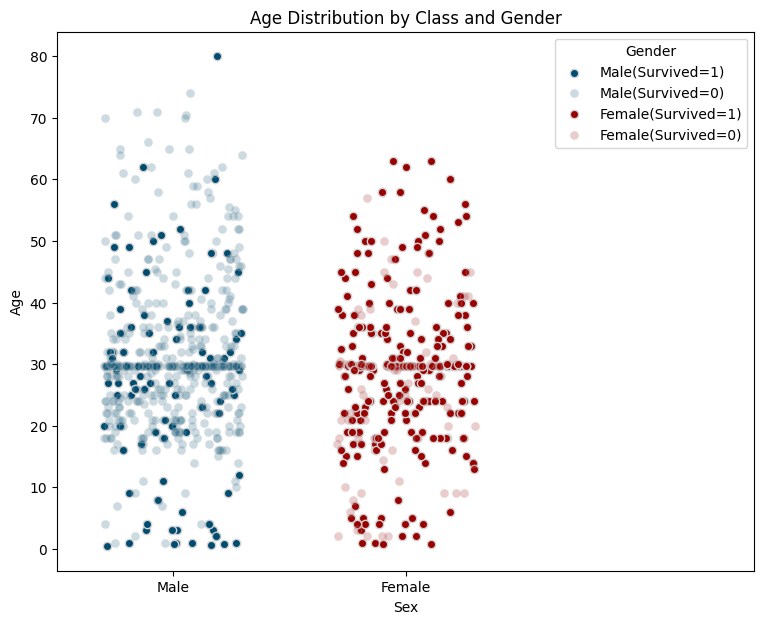

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)
# Create the male and female groups for survivors and non-survivors
male_pos = df[(df['sex']=='male') & (df['survived']==1)]['age']
male_neg = df[(df['sex']=='male') & (df['survived']==0)]['age']
female_pos = df[(df['sex']=='female') & (df['survived']==1)]['age']
female_neg = df[(df['sex']=='female') & (df['survived']==0)]['age']

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

plt.title("Age Distribution by Class and Gender")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.xlim(-0.5, 2.5)  # set x-axis limits
plt.xticks([0, 1], ["Male", "Female"])  # set x-axis tick labels
plt.legend(title="Gender")
# show the plot
plt.show()